### first we will import all the important library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline


### read the data using pandas as pd and read the first 5 rows of the data using head

In [2]:
df = pd.read_csv("C:/Users/anjali suryawanshi/Downloads/heart-disease-dataset/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#####  After you have loaded the dataset, you might want to know a little bit more about it. You can check attriutes names and datatypes using info() 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


##### The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data 

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# feature selection

In [7]:
df.corr() ##correlation of independent feature

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


#### Now in the next cell we will import seaborn library and plot heatmap to see the correlation between the independent variable,whether it is positively correlated or negatively correlated

In [8]:
import seaborn as sns

C:\Users\anjali suryawanshi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


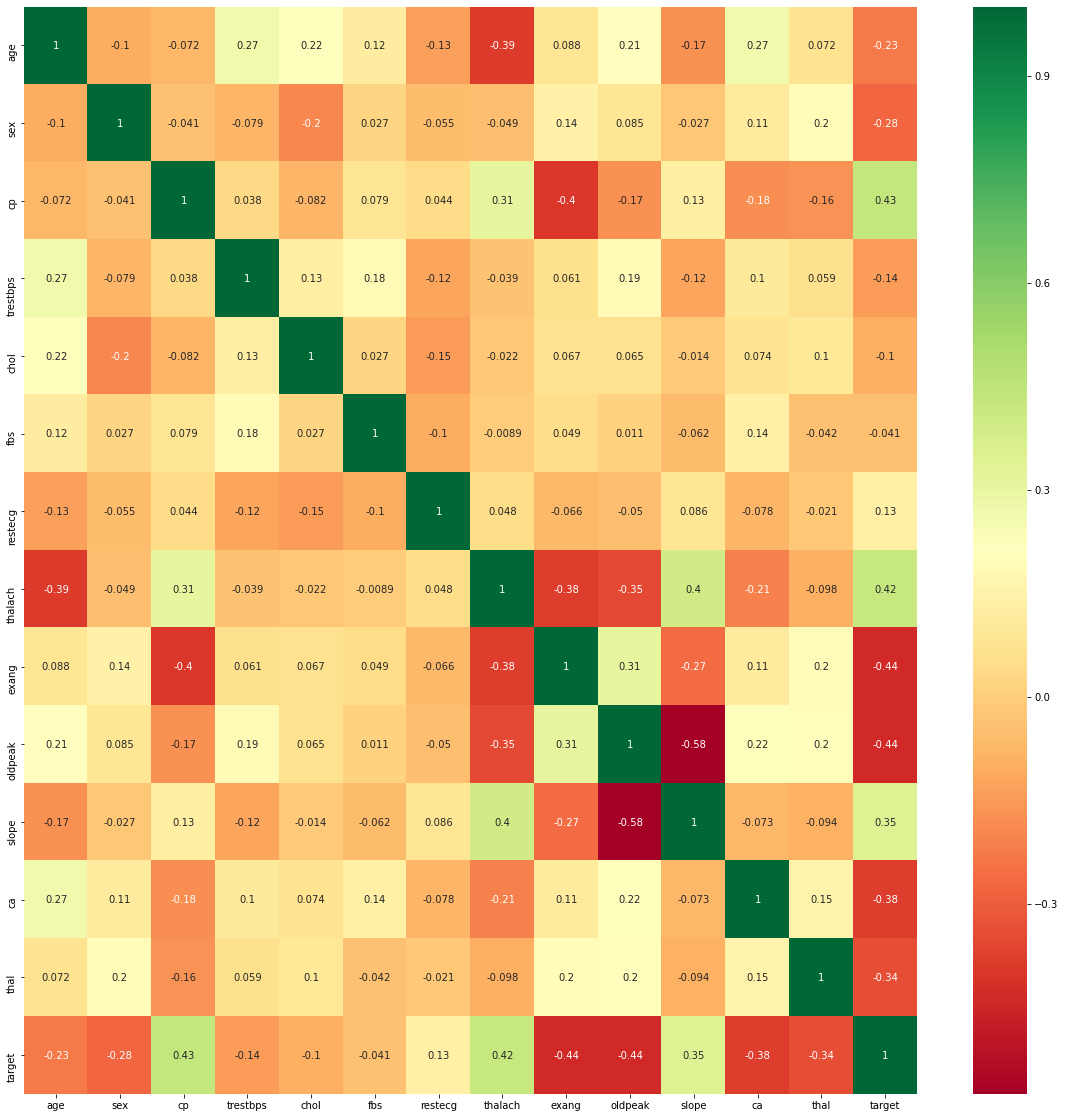

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True,cmap='RdYlGn')

In [10]:
plt.rcParams['figure.figsize']=(20,10)

#### Now we will plot histogram of the whole data to see the frequency of the each feature , It shows how each feature and label is distributed along different ranges, which further confirms the need for scaling.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F012DE42C8>,
      dtype=object)

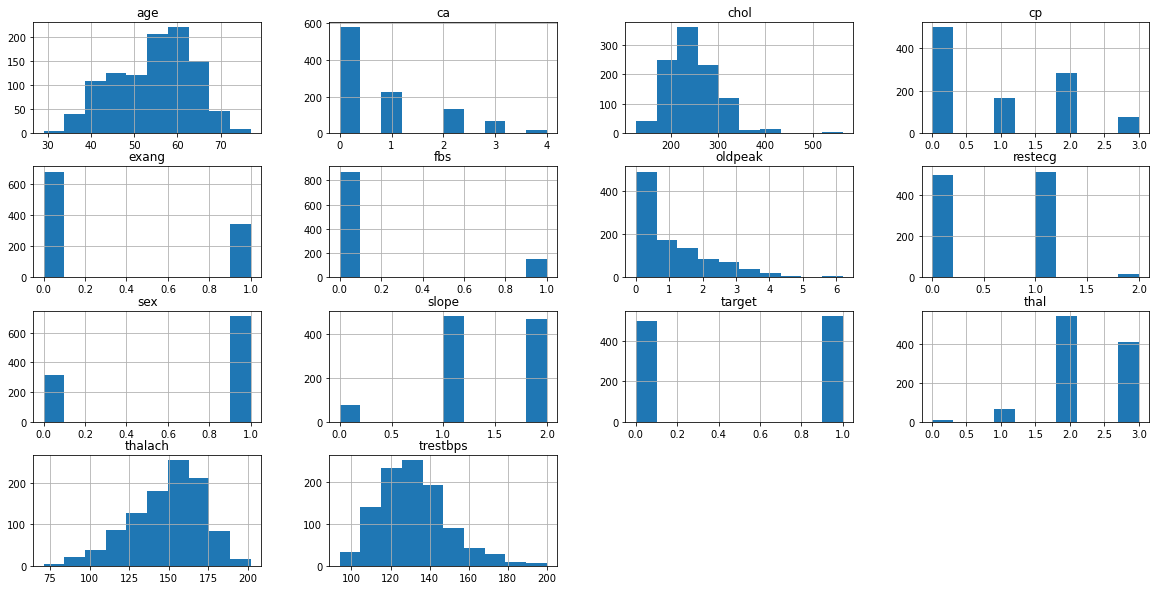

In [11]:
df.hist()

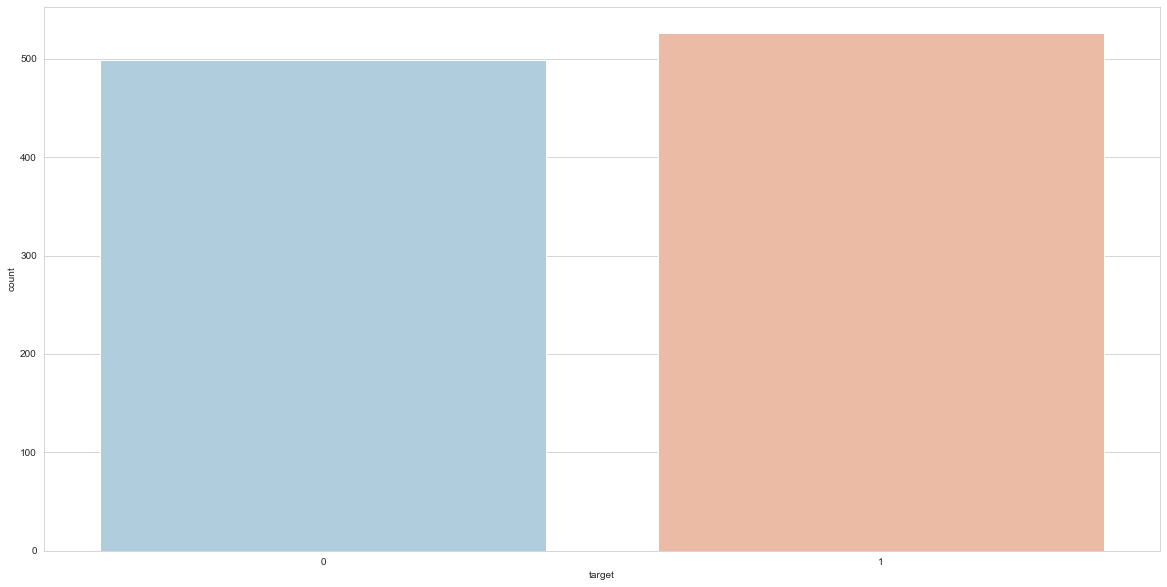

In [12]:
#check imbalance in dataset
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

# standard scaling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()

#### In this cell we will do standard scaling to normalize the data,The Standard Scaler assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1

In [14]:
column_to_scale = ['age','trestbps', 'chol', 'thalach', 'oldpeak']
df[column_to_scale]= std_sc.fit_transform(df[column_to_scale])

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0


In [16]:
x= df.drop(['target'],axis=1) #drop target variable and rest is X 
y = df['target'] #target vairbale 

#### we divide the data  in the training dataset and testing_dataset in the ratio of 0.70 and 0.30. training data is used to train the model and test data is used to check the performence of the model.

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

#### now we will import the KNN algorithms to fit the  training data and test the data

In [18]:
from sklearn.neighbors import KNeighborsClassifier


##### now in this line we will run a loop to choose the perfect nearest neighbors and fit the train data  and predict on test data

In [19]:
from sklearn.metrics import accuracy_score
knn_score = []
for k in range(1,21):
    

    knn= KNeighborsClassifier(n_neighbors=k)

    score = knn.fit(x_train,y_train)

    y_pred = knn.predict(x_test)
    knn_score.append(accuracy_score(y_test,y_pred)*100)


In [20]:
knn_score

[100.0,
 96.1038961038961,
 95.12987012987013,
 88.96103896103897,
 84.74025974025975,
 87.01298701298701,
 87.01298701298701,
 89.28571428571429,
 89.6103896103896,
 89.28571428571429,
 87.01298701298701,
 87.01298701298701,
 86.68831168831169,
 87.33766233766234,
 88.96103896103897,
 89.28571428571429,
 88.96103896103897,
 88.96103896103897,
 87.01298701298701,
 85.3896103896104]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

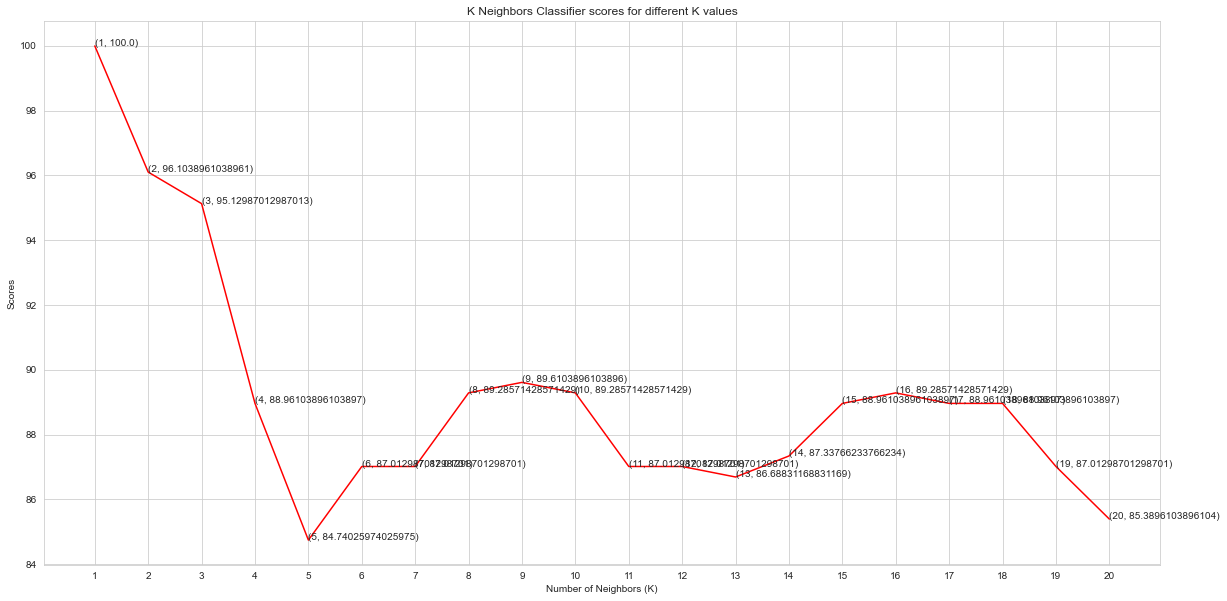

In [21]:
plt.plot([k for k in range(1, 21)], knn_score, color = 'red') ##plot the graph to see on which  nearest neighbor we will get the good accuracy
for i in range(1,21):
    plt.text(i, knn_score[i-1], (i, knn_score[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [22]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [23]:
accuracy_score(y_test,y_pred)*100  #accuracy on the test data

89.6103896103896

In [24]:
#from cross validation score
from sklearn.model_selection import cross_val_score 
knn_score = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,x,y,cv=10)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

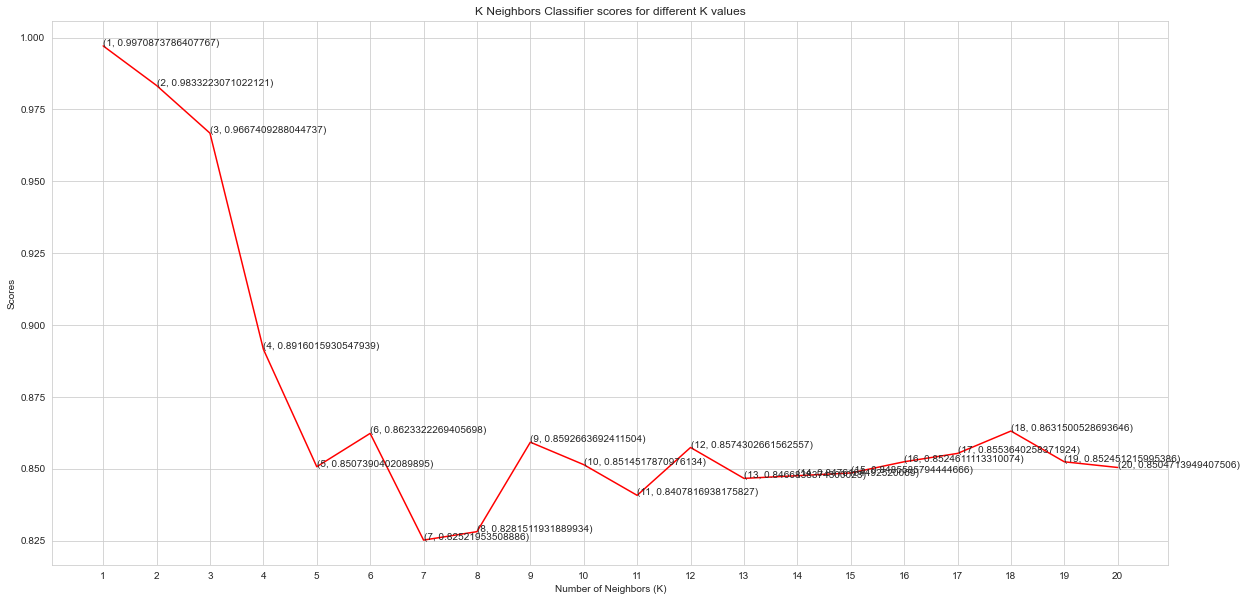

In [25]:
plt.plot([k for k in range(1, 21)], knn_score, color = 'red')
for i in range(1,21):
    plt.text(i, knn_score[i-1], (i, knn_score[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [26]:
knn= KNeighborsClassifier(n_neighbors=9)
score = cross_val_score(knn,x,y,cv=10)
score.mean()

0.8592663692411504

### From Decision Tree Algorithm

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
y_predt = clf.predict(x_test)

In [30]:
accuracy_score(y_test,y_predt)*100 ##Through decision tree we got 89% accuracy on our  test data

89.6103896103896

In [36]:
##import confusion matrix 
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
con = confusion_matrix(y_test,y_pred) ##confusion matrix of decision tree

In [38]:
print(con)

[[129  16]
 [ 16 147]]


In [39]:
report=classification_report(y_test,y_pred) ## classifiaction report of KNN

In [40]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       145
           1       0.90      0.90      0.90       163

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.90      0.90      0.90       308

